In [3]:
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score
from matplotlib.pyplot import scatter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

random.seed(0)

In [6]:
path = 'data_blood.txt'
X = np.loadtxt(path)
X.shape

(3000, 5)

In [16]:
n_components = 3
N = X.shape[0]
gmm = GaussianMixture(n_components=3, covariance_type='spherical', tol=0.001, reg_covar=1e-06, max_iter=200, n_init=10,init_params='random')

gmm.fit(X)

GaussianMixture(covariance_type='spherical', init_params='random', max_iter=200,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [17]:
print("Parameters : ")
print(gmm.get_params())

Parameters : 
{'covariance_type': 'spherical', 'init_params': 'random', 'max_iter': 200, 'means_init': None, 'n_components': 3, 'n_init': 10, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}


In [18]:
print("Mean : ")
print(gmm.means_)

Mean : 
[[-3.06176428e+00 -3.96696240e+00 -5.02048769e+00 -5.02021252e+00
  -6.00420335e+00]
 [ 1.05250251e-02  4.16618640e-03  1.35683863e-02  1.00207924e-02
  -2.47443547e-02]
 [ 2.99520441e+00  3.97929290e+00  4.93552594e+00  4.95000613e+00
   6.02926365e+00]]


In [19]:
print("Covariances")
print(gmm.covariances_)

Covariances
[0.96995605 0.24586219 0.97851816]


In [20]:
labels = gmm.predict(X)
mu = gmm.means_
print(labels.shape)

(3000,)


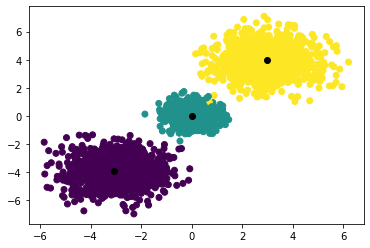

In [21]:
sorted_gs = np.argsort(gmm.means_[:, 0])
sorted_colors = list(range(n_components))
color_dict ={}
for i,g in enumerate(sorted_gs):
    color_dict[g] = sorted_colors[i]
c = np.array([color_dict[i] for i in labels])


plt.scatter(X[:,0],X[:,1],c = c)
plt.scatter(mu[:,0],mu[:,1],c='k')
plt.show()

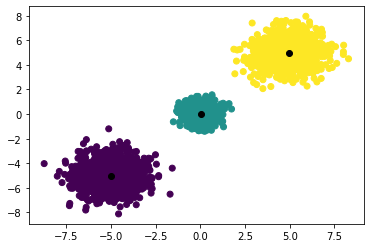

In [22]:
sorted_gs = np.argsort(gmm.means_[:, 3])
color_dict ={}
for i,g in enumerate(sorted_gs):
    color_dict[g] = sorted_colors[i]
c = np.array([color_dict[i] for i in labels])


plt.scatter(X[:,2],X[:,3],c = c)
plt.scatter(mu[:, 2], mu[:, 3],c= 'k')
plt.show()

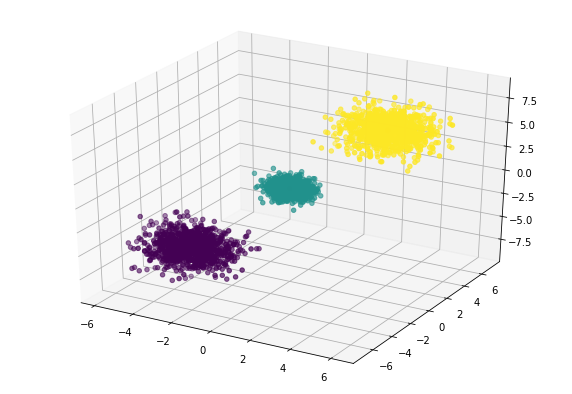

In [23]:
sorted_gs = np.argsort(gmm.means_[:, 0])
sorted_colors = list(range(n_components))
color_dict ={}
for i,g in enumerate(sorted_gs):
    color_dict[g] = sorted_colors[i]
c = np.array([color_dict[i] for i in labels])

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X[:,0], X[:,1], X[:,2], c=c)
ax.scatter3D(mu[:,0], mu[:,1], mu[:,2], c='k')
plt.show()

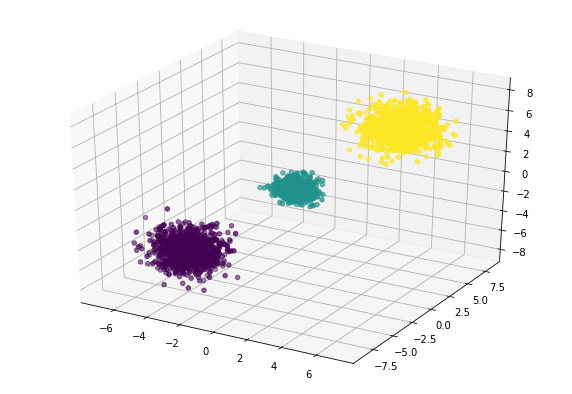

In [24]:
sorted_gs = np.argsort(gmm.means_[:, 0])
sorted_colors = list(range(n_components))
color_dict ={}
for i,g in enumerate(sorted_gs):
    color_dict[g] = sorted_colors[i]
c = np.array([color_dict[i] for i in labels])

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X[:,1], X[:,2], X[:,3], c=c)
ax.scatter3D(mu[:,1], mu[:,2], mu[:,3], c='k')
plt.show()